# 2 Exploratory Data Analysis



## Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")

import datetime as dt
import colorcet as cc

from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot,quarter_plot


___

## Loading data

### train.csv

In [2]:
df_train = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/train.csv',
                      index_col='date', parse_dates=True)
df_train = df_train.drop(columns='id')

In [3]:
df_train.head()

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0
2013-01-01,1,BABY CARE,0.0,0
2013-01-01,1,BEAUTY,0.0,0
2013-01-01,1,BEVERAGES,0.0,0
2013-01-01,1,BOOKS,0.0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   store_nbr    int64  
 1   family       object 
 2   sales        float64
 3   onpromotion  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 114.5+ MB


### stores.csv

In [5]:
df_stores = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/stores.csv')

In [6]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


### oil.csv

In [8]:
df_oil = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/oil.csv',
                    index_col='date',parse_dates=True)

In [9]:
df_oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [10]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


### holidays_events.csv

In [11]:
df_holiday = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/holidays_events.csv',
                        index_col='date', parse_dates=True)

In [12]:
df_holiday.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [13]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2012-03-02 to 2017-12-26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         350 non-null    object
 1   locale       350 non-null    object
 2   locale_name  350 non-null    object
 3   description  350 non-null    object
 4   transferred  350 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 14.0+ KB


___

## Exploratory Data Analysis



### Aggregated sales

Here we will take a look at the time sereies of the aggregated sales to get an understanding how sales behave.

In [14]:
df_agg_sales = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/agg_sales.csv',
                           index_col = 'date', parse_dates=True )

In [15]:
df_agg_sales.head()

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


Let's visualize the 7.8 magnitude earthquake that hit Ecuador in April. 2016.

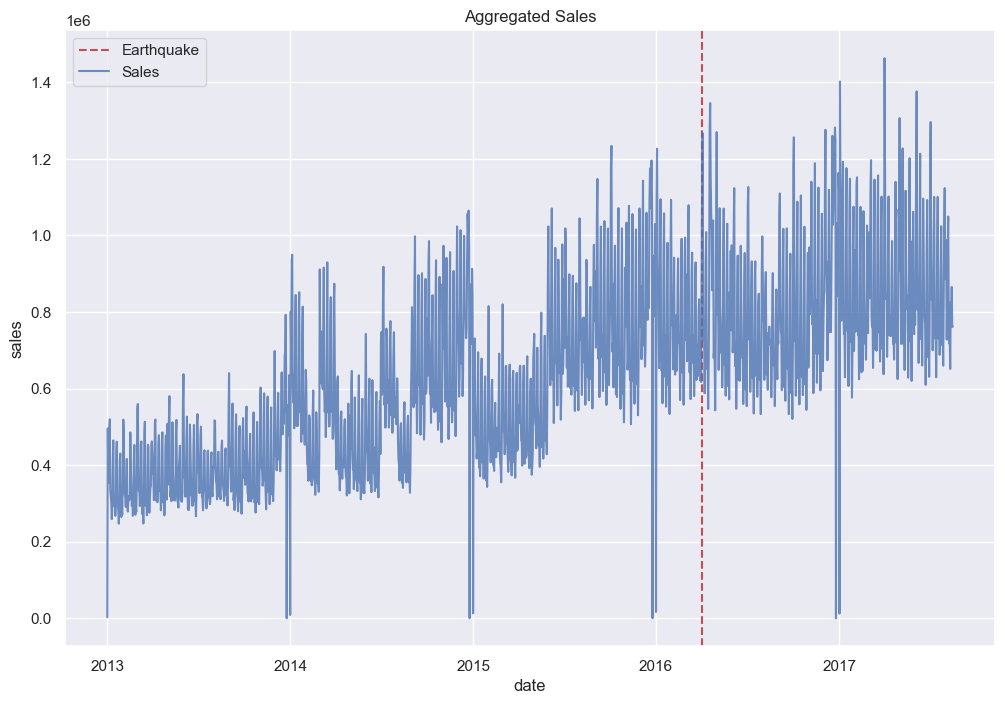

In [16]:
plt.figure(figsize=(12,8))
plt.axvline(x = dt.date(2016,4,1), color = 'r', ls = '--', label = 'Earthquake')
plt.title(label = 'Aggregated Sales')
sns.lineplot(x = df_agg_sales.index, y = 'sales', data = df_agg_sales, label = 'Sales', legend = True, alpha = 0.8,)
plt.show()

The effect doesn't seem to be noticable when taking the entire time span into account. Let's try to visualize only the year 2016 and see if that changes anything.

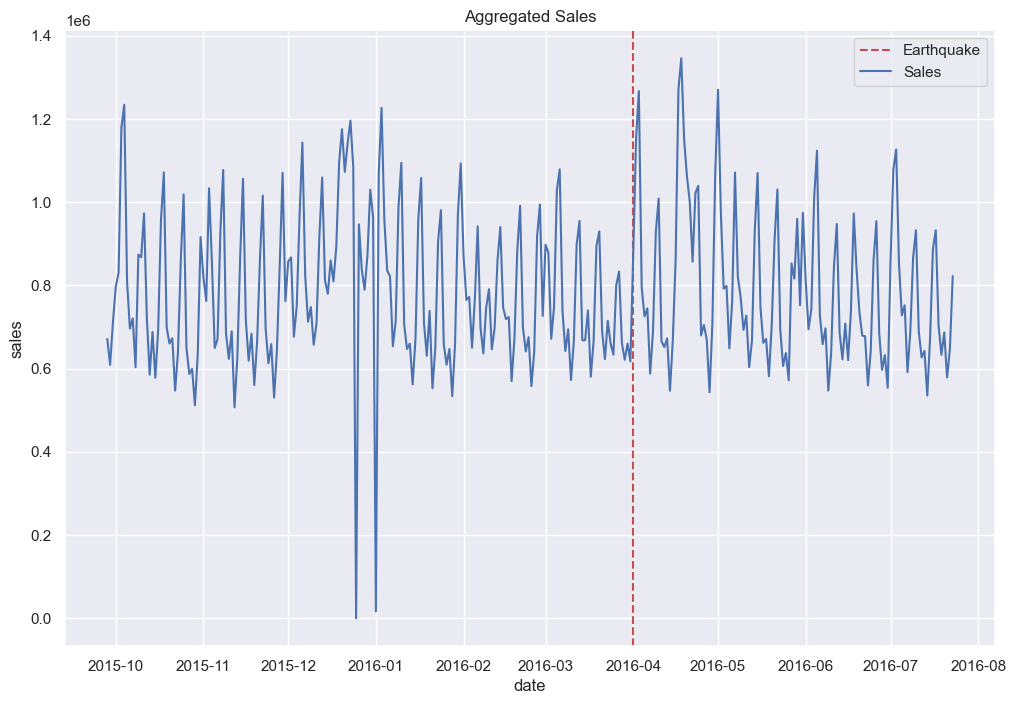

In [17]:
plt.figure(figsize=(12,8))
plt.title('Aggregated Sales')
plt.axvline(x = dt.date(2016,4,1), color = 'r', ls = '--', label = 'Earthquake')
sns.lineplot(x = df_agg_sales.index[1000:1300], y = 'sales', data = df_agg_sales[1000:1300], label = 'Sales', legend = True);

The effect of the earthquake is still not apparent. Perhaps the earthquake only affected a specific region, and aggregating the data makes the effect less obvious.</br>
___

### Oil prices

Let's examine how the price of oil affects sales: 

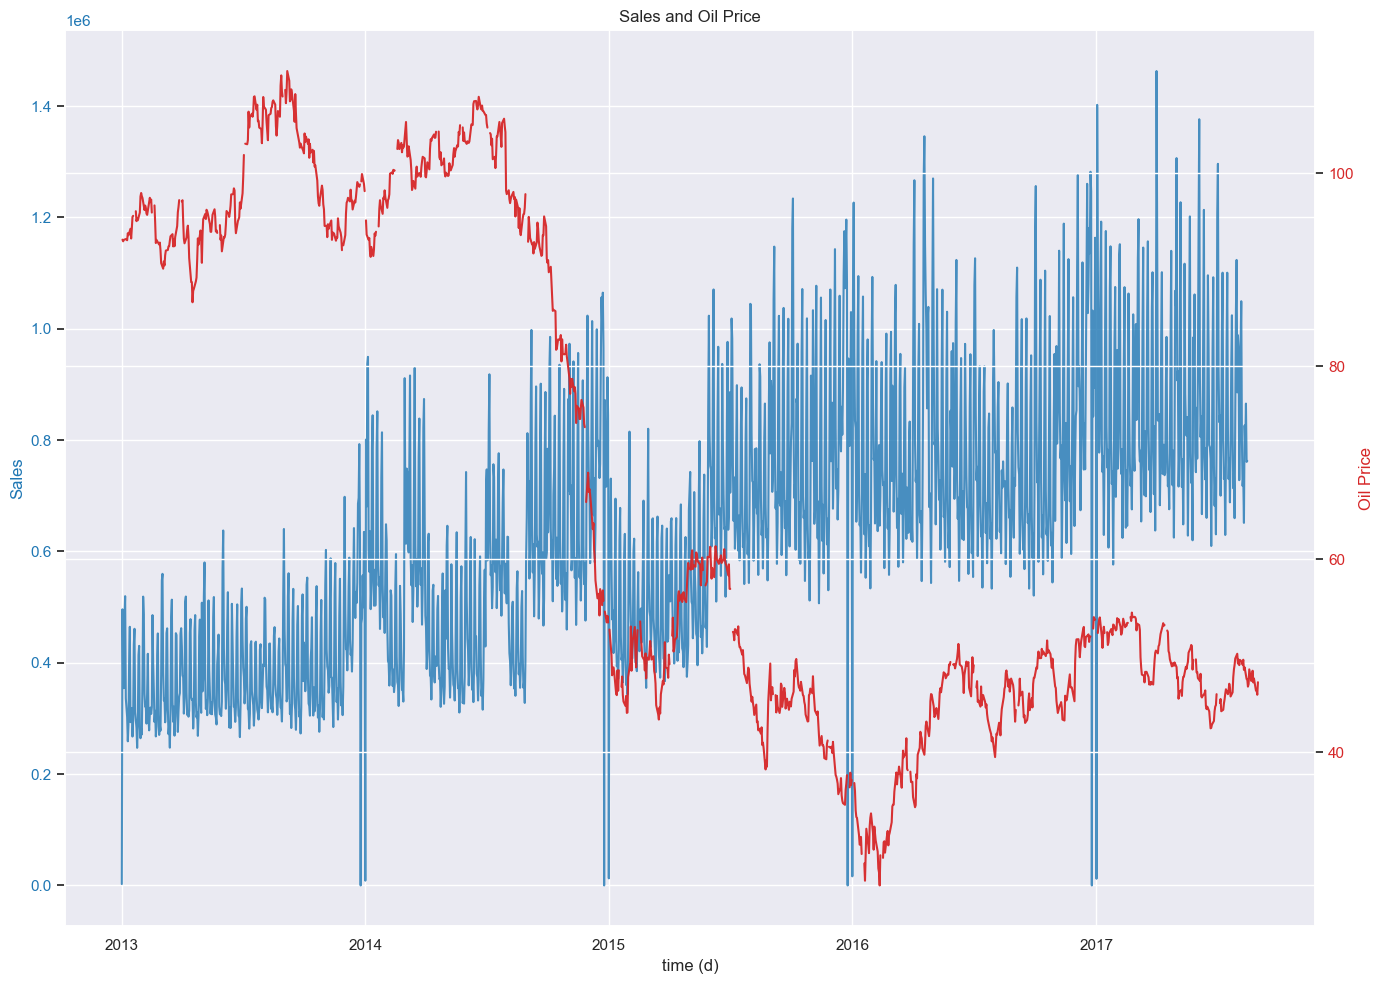

In [18]:
fig, ax1 = plt.subplots(figsize = (14,10))

color = 'tab:blue'
ax1.set_xlabel('time (d)')
ax1.set_ylabel('Sales', color=color)
ax1.plot(df_agg_sales.index, df_agg_sales, color=color, alpha = 0.8 )
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Oil Price', color=color)  # we already handled the x-label with ax1
ax2.plot(df_oil.index, df_oil['dcoilwtico'], color=color, alpha = 0.95)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Sales and Oil Price')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

This graph looks interesting, although it's hard to establish a relationship by eye alone. Let's try using rolling averages.

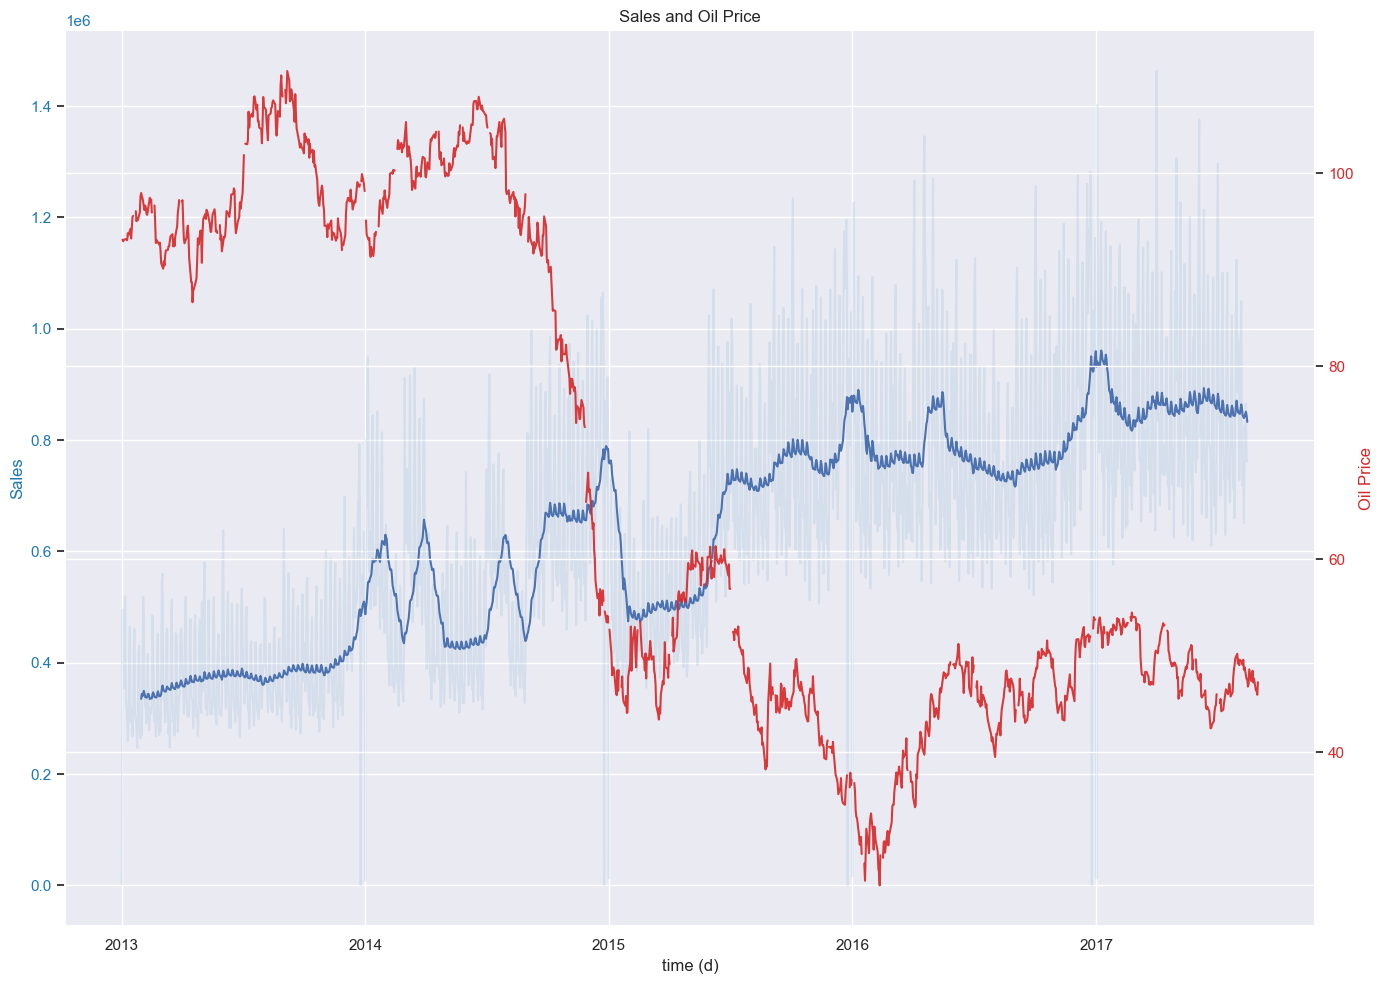

In [19]:
fig, ax1 = plt.subplots(figsize = (14,10))

color = 'tab:blue'
ax1.set_xlabel('time (d)')
ax1.set_ylabel('Sales', color=color)
ax1.plot(df_agg_sales.index, df_agg_sales, color=color, alpha = 0.1 )
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(df_agg_sales.rolling(window=30).mean())
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Oil Price', color=color)  # we already handled the x-label with ax1
ax2.plot(df_oil.index, df_oil['dcoilwtico'], color=color, alpha = 0.9)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot(df_oil.rolling(window = 14).mean(), color = 'red')
plt.title('Sales and Oil Price')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Assuming there is a relationship between oil prices and sales, maybe it takes oil prices some time to affect sales. To view this we will shift the oil prices backwards. 

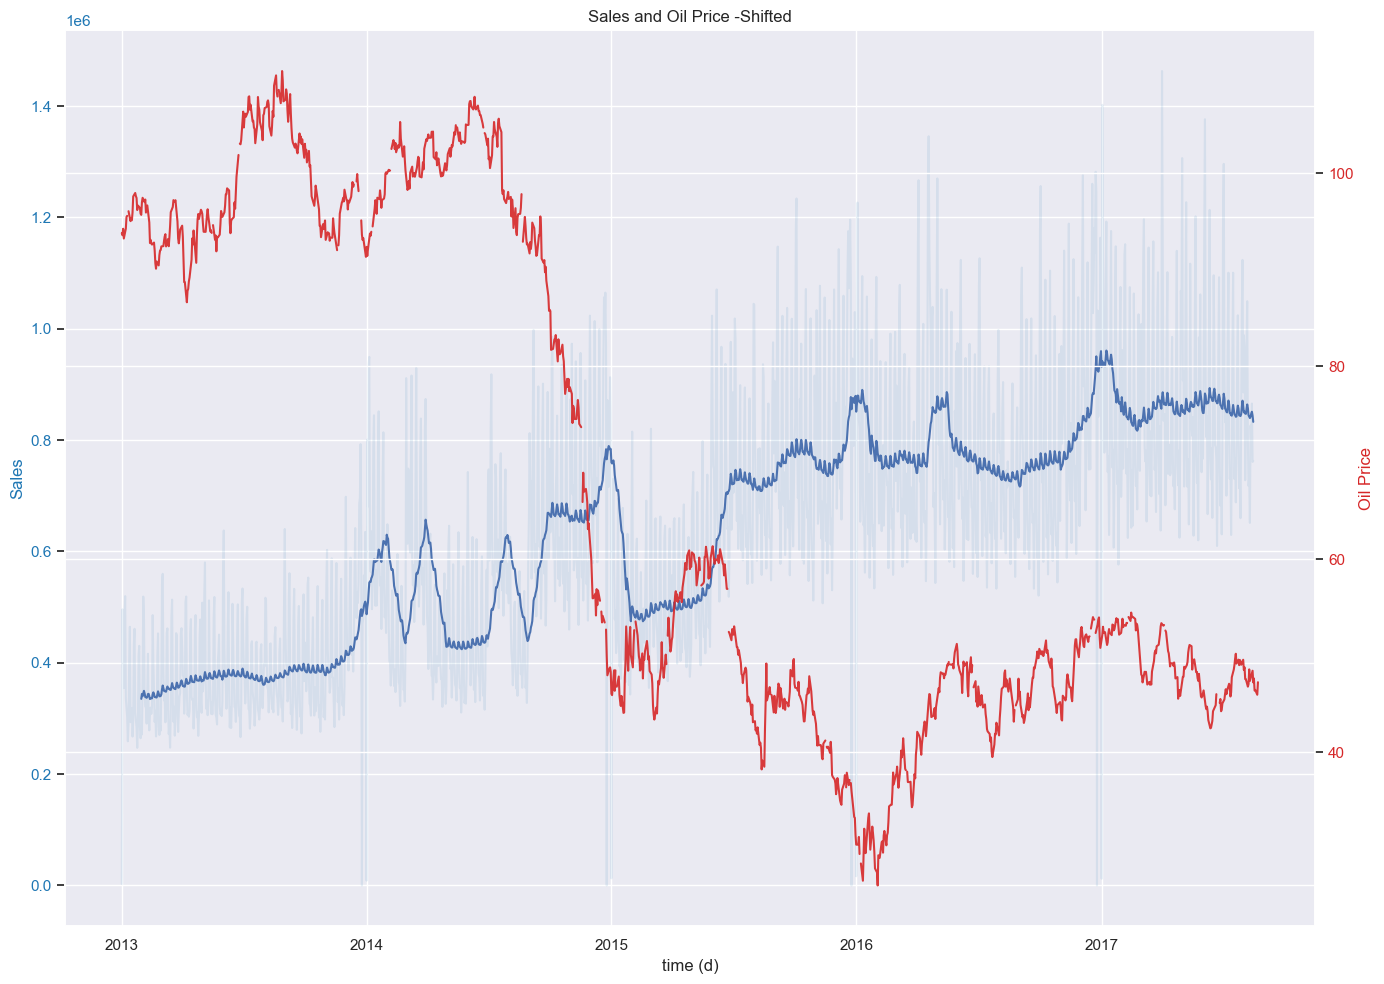

In [20]:
fig, ax1 = plt.subplots(figsize = (14,10))

color = 'tab:blue'
ax1.set_xlabel('time (d)')
ax1.set_ylabel('Sales', color=color)
ax1.plot(df_agg_sales.index, df_agg_sales, color=color, alpha = 0.1 )
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(df_agg_sales.rolling(window=30).mean())
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Oil Price', color=color)  # we already handled the x-label with ax1
ax2.plot( df_oil.shift(-7), color=color, alpha = 0.9)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot(df_oil.rolling(window = 14).mean(), color = 'red')
plt.title('Sales and Oil Price -Shifted')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

A better way to investigate the relationship between the two variables would to use a scatterplot:

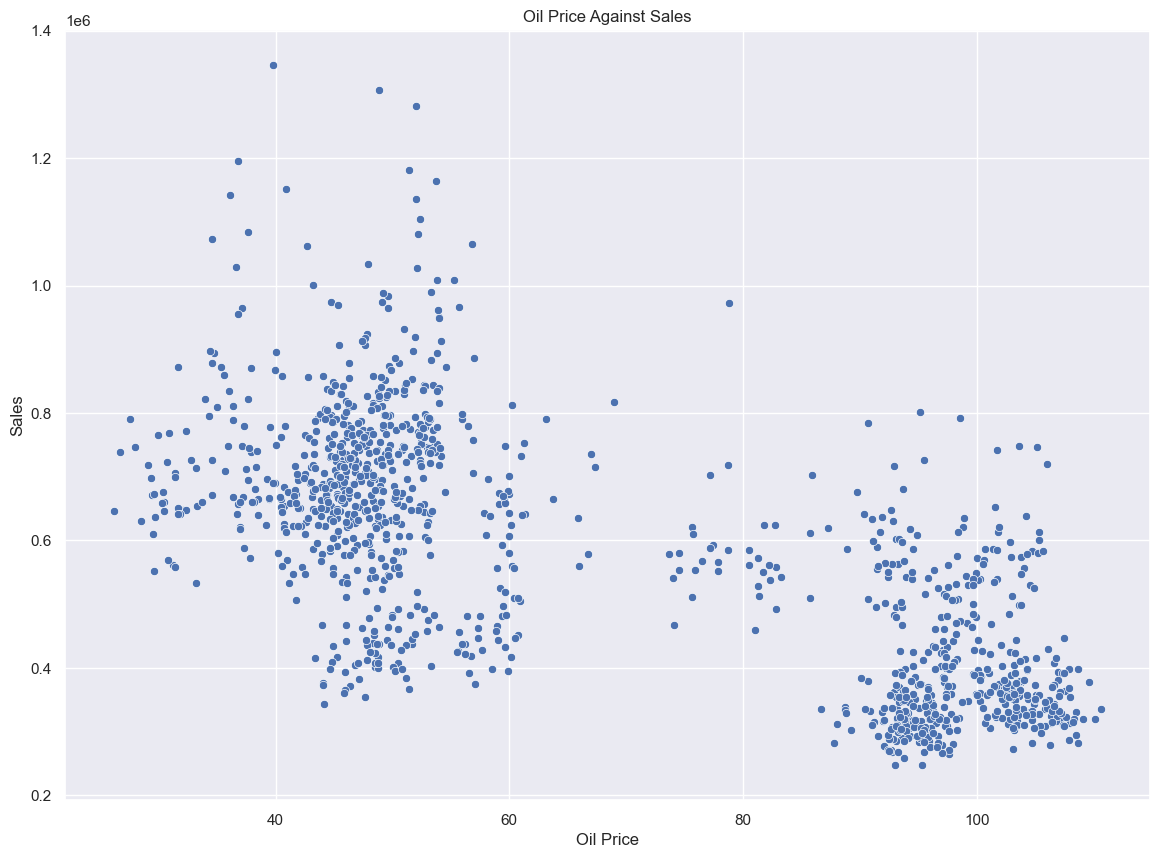

In [21]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = df_oil['dcoilwtico'], y = df_agg_sales['sales'])
plt.title('Oil Price Against Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

In [22]:
df_oil['dcoilwtico'].corr(df_agg_sales['sales'])

-0.7050015324800488

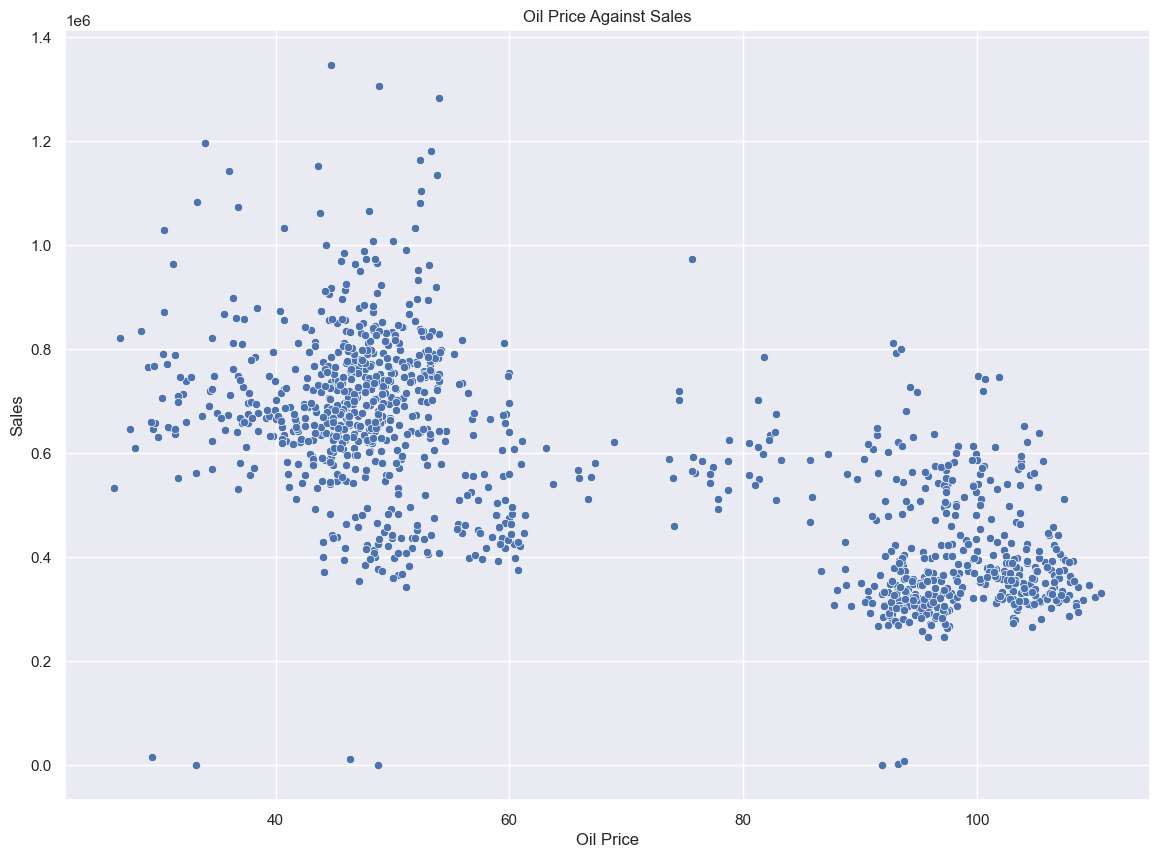

In [23]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = df_oil['dcoilwtico'].shift(-10), y = df_agg_sales['sales'])
plt.title('Oil Price Against Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

In [24]:
df_oil['dcoilwtico'].shift(-10).corr(df_agg_sales['sales'])

-0.6921144395135456

___

### Holidays

Since we're using aggregated sales accross all regions, we will only investigate national holidays. 

In [25]:
df_holiday_national = df_holiday[df_holiday['locale']=='National']
df_holiday_national.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False


In [26]:
df_holiday_national['type'].value_counts()

Holiday       60
Event         56
Additional    40
Transfer       8
Bridge         5
Work Day       5
Name: type, dtype: int64

In [27]:
df_holiday_national['transferred'].value_counts()

False    166
True       8
Name: transferred, dtype: int64

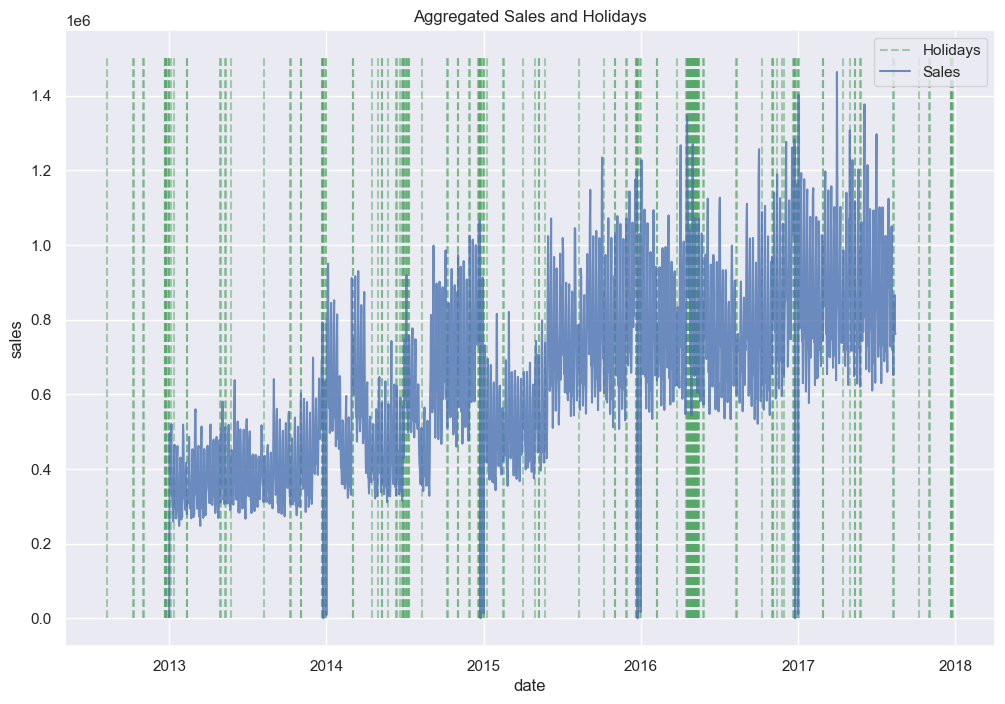

In [28]:
plt.figure(figsize=(12,8))
plt.title('Aggregated Sales and Holidays')
plt.vlines(x = df_holiday_national.index, color = 'g', ls = '--', label = 'Holidays',ymin=0,ymax = 1500000,alpha = 0.5)
sns.lineplot(x = df_agg_sales.index, y = 'sales', data = df_agg_sales, label = 'Sales', legend = True, alpha = 0.8);


In [29]:
df_agg_sales[df_agg_sales['sales']==0]

,sales
date,
2013-12-25,0.0
2014-12-25,0.0
2015-12-25,0.0
2016-12-25,0.0


The only days where there were no sales were on Christmas. 

In [30]:
df_holiday.loc[df_agg_sales[df_agg_sales['sales']==0].index]

,type,locale,locale_name,description,transferred
date,,,,,
2013-12-25,Holiday,National,Ecuador,Navidad,False
2014-12-25,Holiday,National,Ecuador,Navidad,False
2015-12-25,Holiday,National,Ecuador,Navidad,False
2016-12-25,Holiday,National,Ecuador,Navidad,False


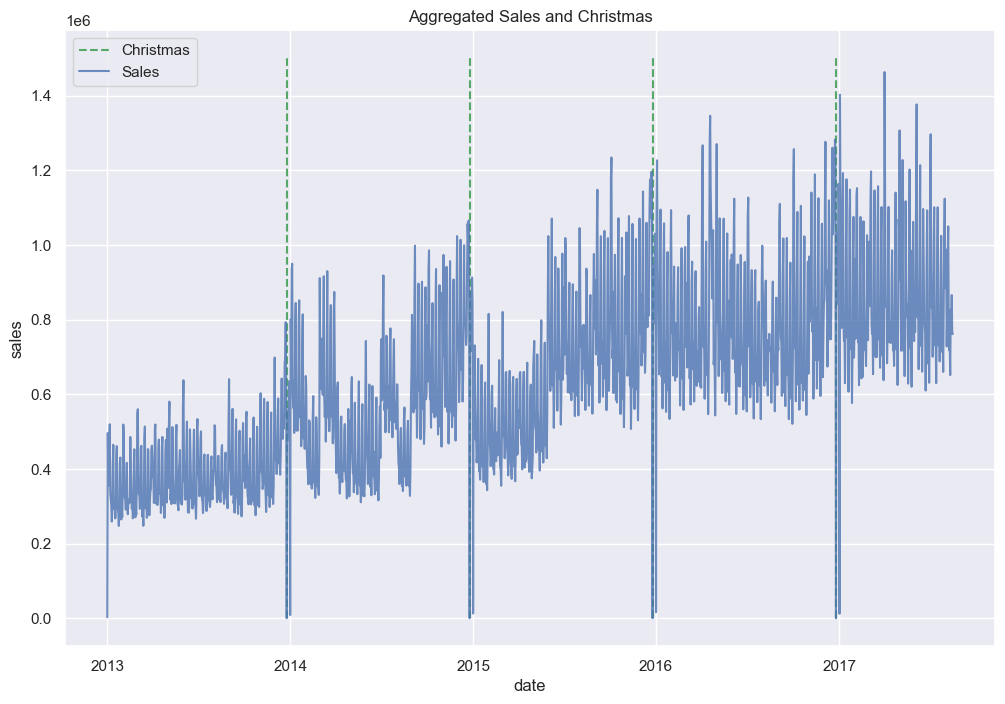

In [31]:
plt.figure(figsize=(12,8))
plt.title('Aggregated Sales and Christmas')
plt.vlines(x = df_holiday.loc[df_agg_sales[df_agg_sales['sales']==0].index].index, color = 'g', ls = '--', label = 'Christmas',ymin=0,ymax = 1500000,alpha = 1)
sns.lineplot(x = df_agg_sales.index, y = 'sales', data = df_agg_sales, label = 'Sales', legend = True, alpha = 0.8);

It seems like there's a second day where sales where almost zero. It appears to be New Year's.

In [32]:
df_agg_sales[(df_agg_sales['sales'] < 0.2e6) & (df_agg_sales['sales'] != 0)]

,sales
date,
2013-01-01,2511.618999
2014-01-01,8602.065404
2015-01-01,12773.616980
2016-01-01,16433.394000
2017-01-01,12082.500997


It's not New Year's Eve but rather the first day of the year. 

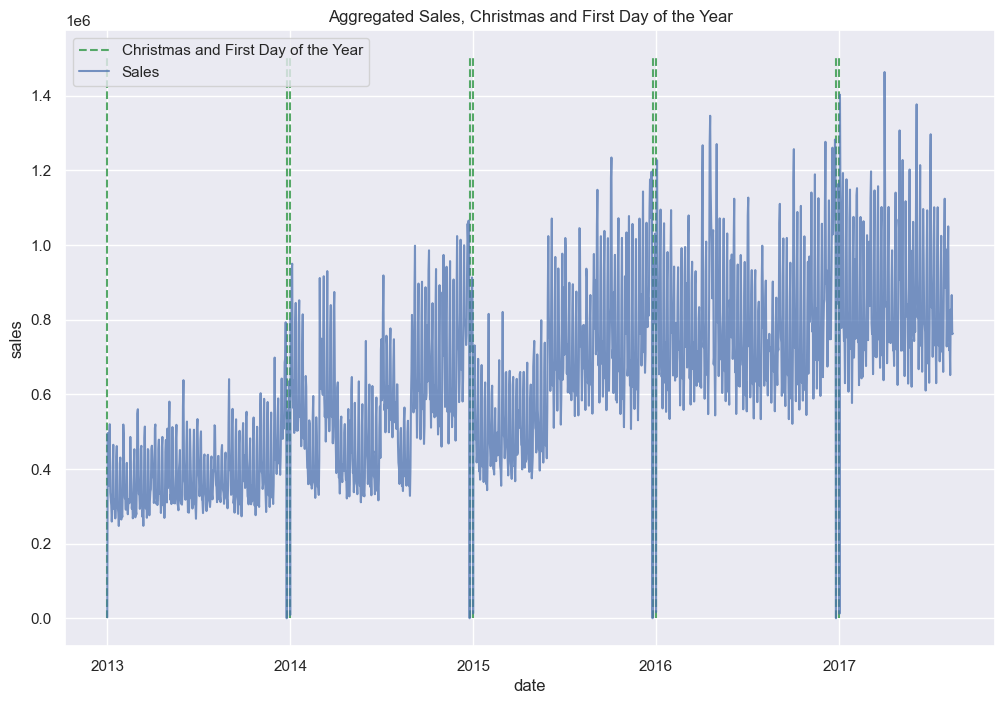

In [33]:
plt.figure(figsize=(12,8))
plt.title('Aggregated Sales, Christmas and First Day of the Year')
plt.vlines(x = df_agg_sales[df_agg_sales['sales'] < 0.2e6].index, color = 'g', ls = '--', label = 'Christmas and First Day of the Year',ymin=0,ymax = 1500000)
sns.lineplot(x = df_agg_sales.index, y = 'sales', data = df_agg_sales, label = 'Sales', legend = True, alpha = 0.75);

___


### Individual stores

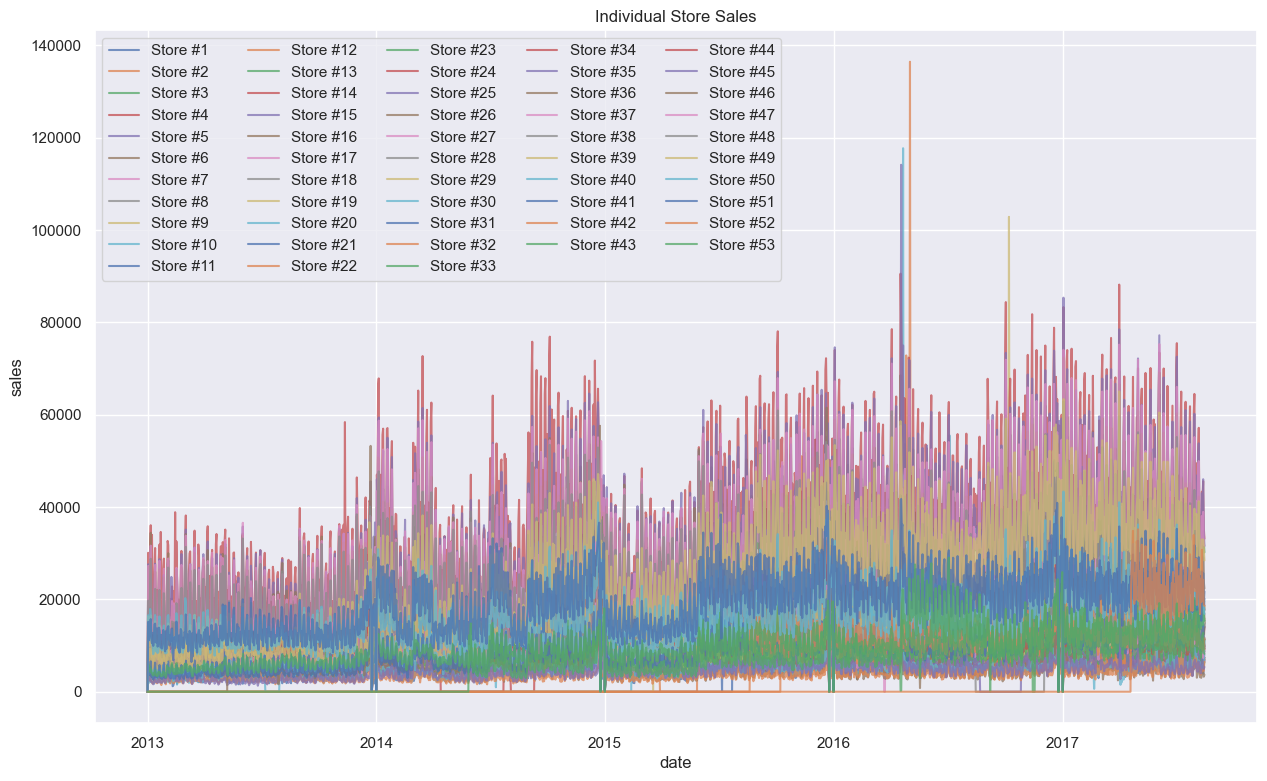

In [34]:
plt.figure(figsize=(15,9))
for i in range(54):
    sns.lineplot(x = df_train[df_train['store_nbr']==i].resample('d').sum(numeric_only = True)[['sales']].index,
                 y = df_train[df_train['store_nbr']==i].resample('d').sum(numeric_only = True)[['sales']]['sales'],
                 data = df_train[df_train['store_nbr']==i].resample('d').sum(numeric_only = True)[['sales']],
                 label = f'Store #{i}', legend = True, alpha = 0.75)
plt.legend(loc='upper left', ncol=5)
plt.title('Individual Store Sales');

              

In [35]:
sorted_total_sales_by_store = df_train.groupby('store_nbr').sum(numeric_only=True).sort_values(by='sales').reset_index()
sorted_total_sales_by_store['store_nbr'] = sorted_total_sales_by_store['store_nbr'].astype(str)
sorted_total_sales_by_store.head()

,store_nbr,sales,onpromotion
0,52,2.696170e+06,30814
1,22,4.090202e+06,99543
2,32,5.951796e+06,89932
3,30,7.382074e+06,103096
4,35,7.676679e+06,110104


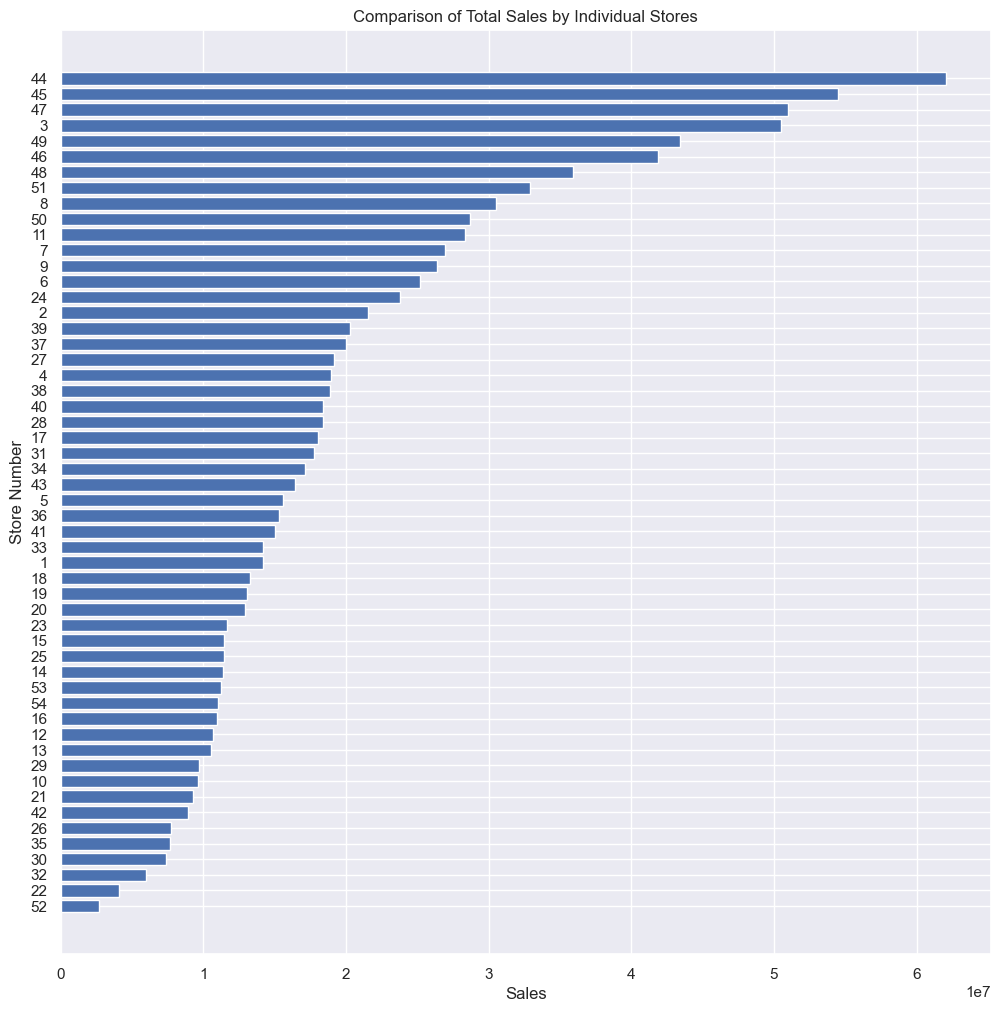

In [36]:
plt.figure(figsize=(12,12))
plt.barh(y = sorted_total_sales_by_store['store_nbr'], width = sorted_total_sales_by_store['sales'])
plt.title('Comparison of Total Sales by Individual Stores')
plt.xlabel('Sales')
plt.ylabel('Store Number');

This plot shows the total sales by store. We can clearly see which stores performed better than which stores, but this graph doesn't give the full picture, since some stores opened later than others. Plus, the population of the city a store is in isn't taken into consideration either. Next, we will try to visualize the importance of the location of a store by using color.

In [37]:
sorted_total_sales_by_store = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/sorted_total_sales_by_store.csv')

In [38]:
sorted_total_sales_by_store['store_nbr'] = sorted_total_sales_by_store['store_nbr'].astype(str)

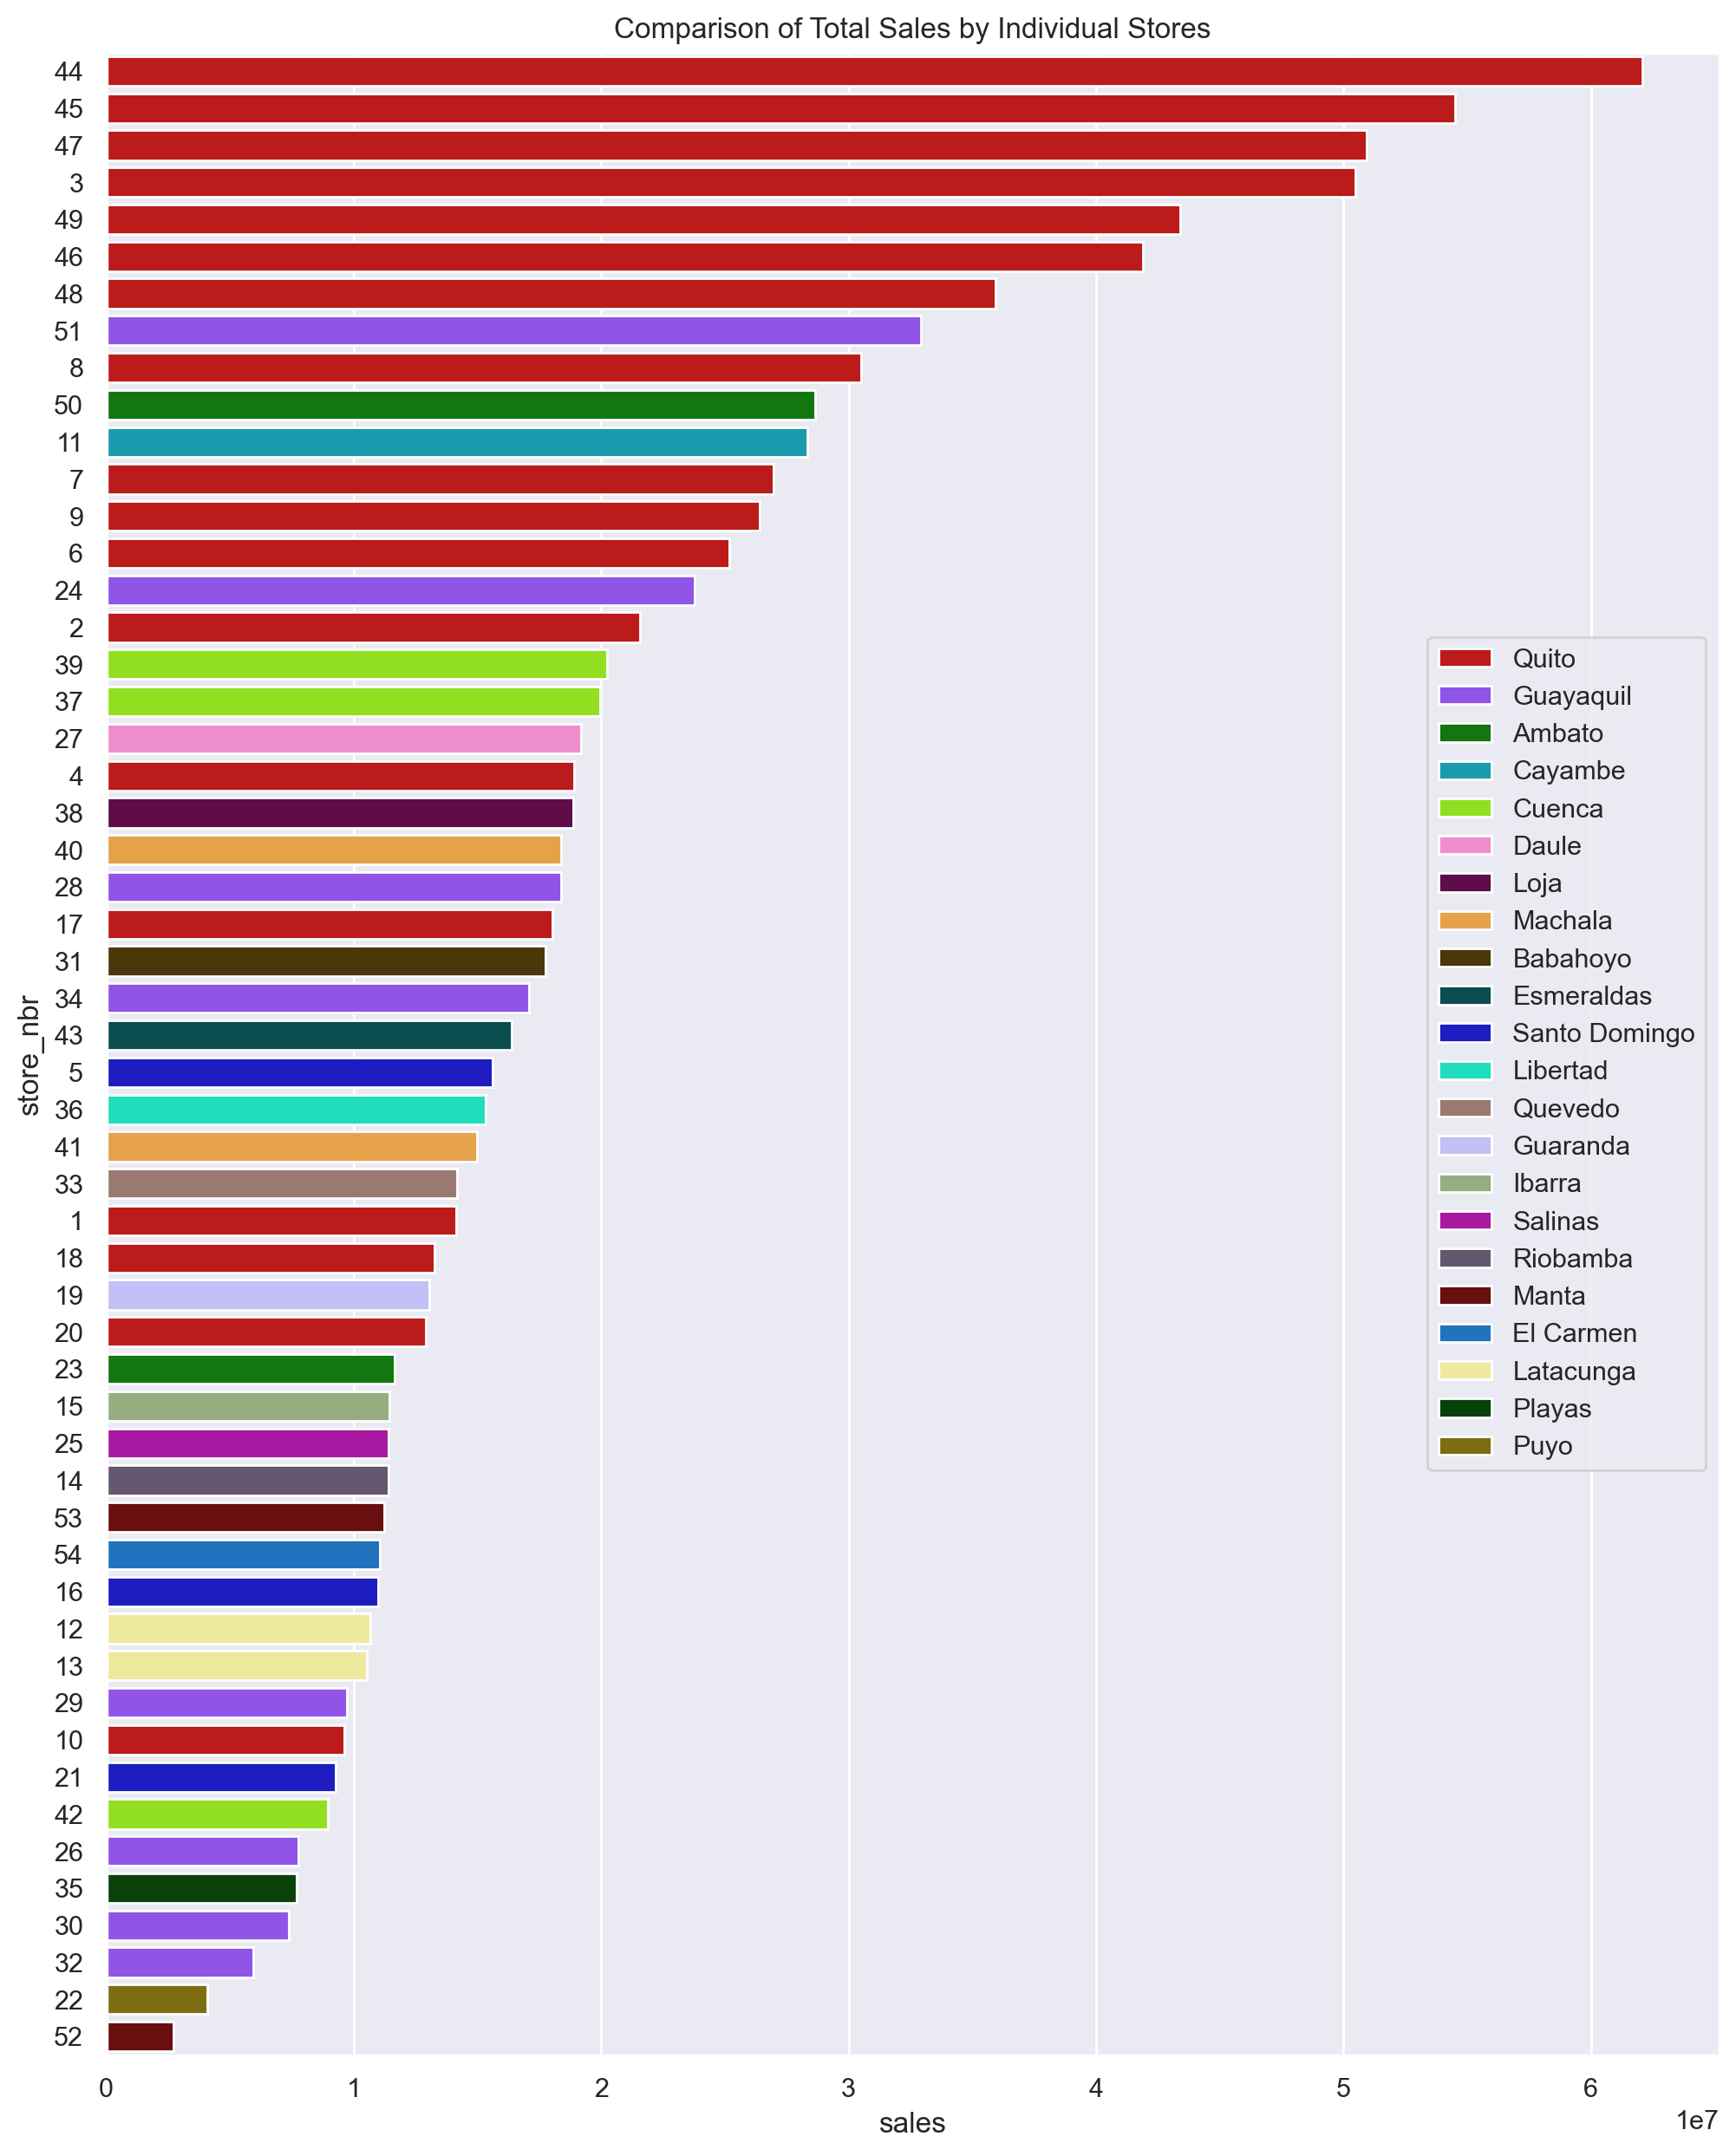

In [39]:
plt.figure(figsize=(12,15), dpi=200)

sns.barplot( y = 'store_nbr', x= 'sales', hue = 'city',data=sorted_total_sales_by_store, dodge=False, palette=sns.color_palette(cc.glasbey, n_colors=60))
plt.title('Comparison of Total Sales by Individual Stores')
plt.legend(loc='center right')
plt.show();

___

### Sales by category

In [40]:
sale_by_category = df_train.groupby('family').sum()['sales'].reset_index()

In [41]:
sale_by_category

,family,sales
0,AUTOMOTIVE,5.548220e+05
1,BABY CARE,1.005100e+04
2,BEAUTY,3.378930e+05
3,BEVERAGES,2.169545e+08
4,BOOKS,6.438000e+03
5,BREAD/BAKERY,4.213395e+07
6,CELEBRATION,7.611770e+05
7,CLEANING,9.752129e+07
8,DAIRY,6.448771e+07
9,DELI,2.411032e+07


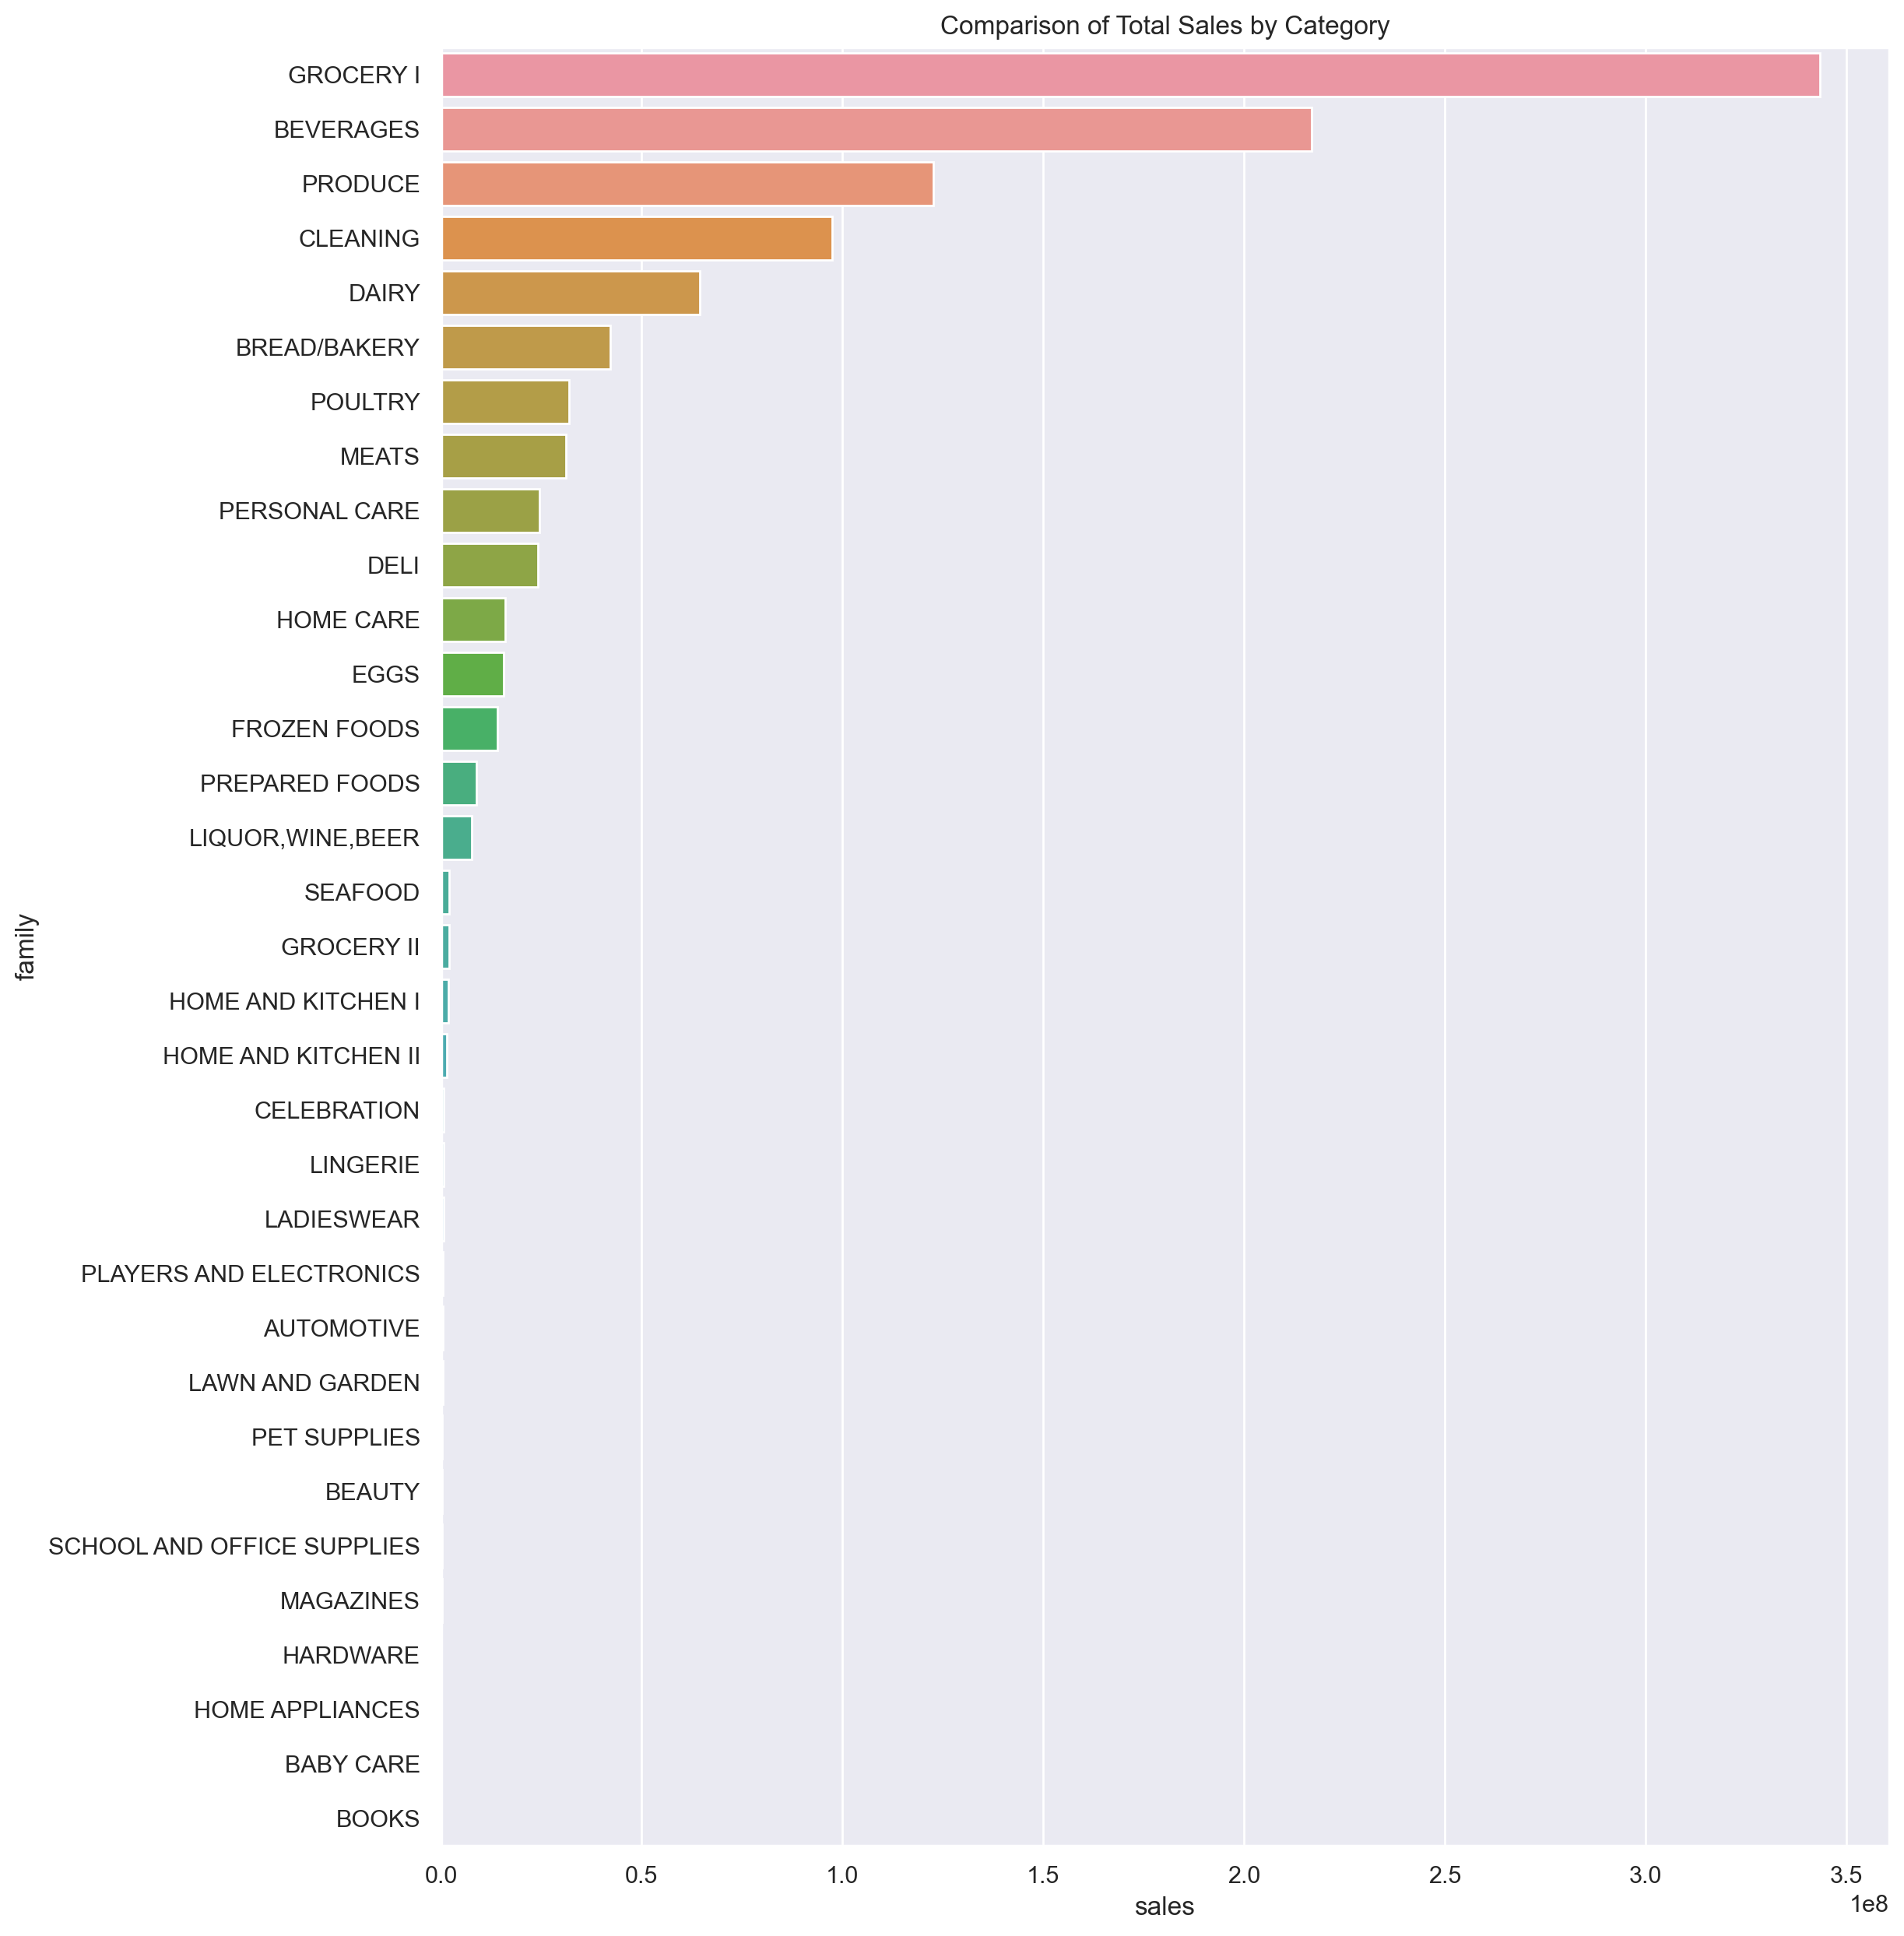

In [42]:
plt.figure(figsize=(12,15), dpi=200)
sns.barplot( x = 'sales', y= 'family',data=sale_by_category.sort_values(by='sales', ascending = False))
plt.title('Comparison of Total Sales by Category')
plt.show();

___



## Time series analysis

### Seasonal plots

#### Quarterly plot

In [43]:
df_agg_month = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/df_agg_month.csv',
                          index_col='date', parse_dates=True)

In [44]:
df_agg_month.head()

,sales,month,year
date,,,
2013-01-31,1.032762e+07,1,2013
2013-02-28,9.658960e+06,2,2013
2013-03-31,1.142850e+07,3,2013
2013-04-30,1.099346e+07,4,2013
2013-05-31,1.159770e+07,5,2013


In [45]:
df_agg_quart = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/df_agg_quart.csv')

In [46]:
df_agg_quart.head()

,date,sales,Q
0,2013-03-31,3.141508e+07,1
1,2013-06-30,3.428051e+07,2
2,2013-09-30,3.478812e+07,3
3,2013-12-31,3.993530e+07,4
4,2014-03-31,5.131558e+07,1


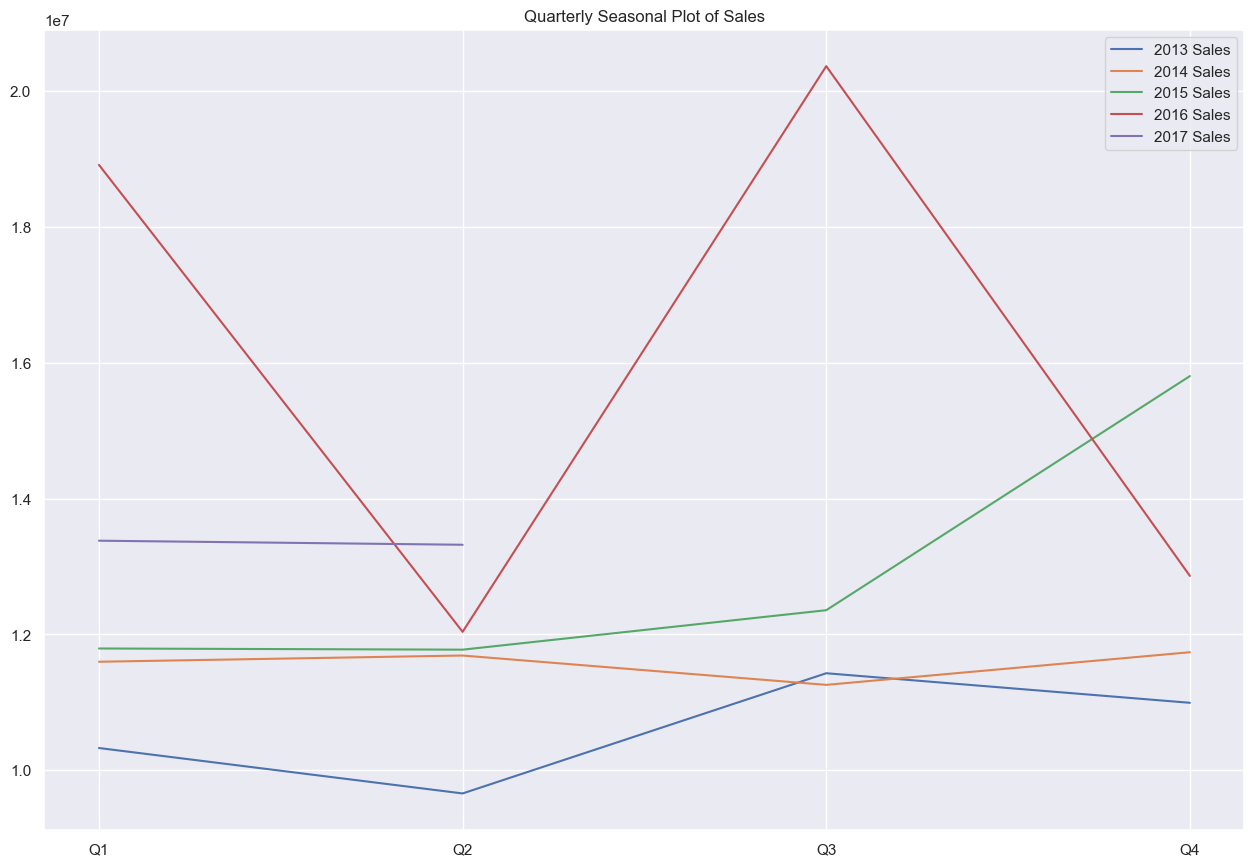

In [47]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(np.arange(1, 5, step=1),['Q1', 'Q2', 'Q3','Q4'])

ax.plot(df_agg_quart[0:4]['Q'], df_agg_month[0:4]['sales'], label = '2013 Sales')
ax.plot(df_agg_quart[4:8]['Q'],df_agg_month[4:8]['sales'], label = '2014 Sales')
ax.plot(df_agg_quart[8:12]['Q'],df_agg_month[8:12]['sales'], label = '2015 Sales')
ax.plot(df_agg_quart[12:16]['Q'],df_agg_month[12:16]['sales'], label = '2016 Sales')
ax.plot(df_agg_quart[16:18]['Q'],df_agg_month[16:18]['sales'], label = '2017 Sales')


plt.title('Quarterly Seasonal Plot of Sales')
plt.legend()
plt.show()

#### Monthly seasonal plot

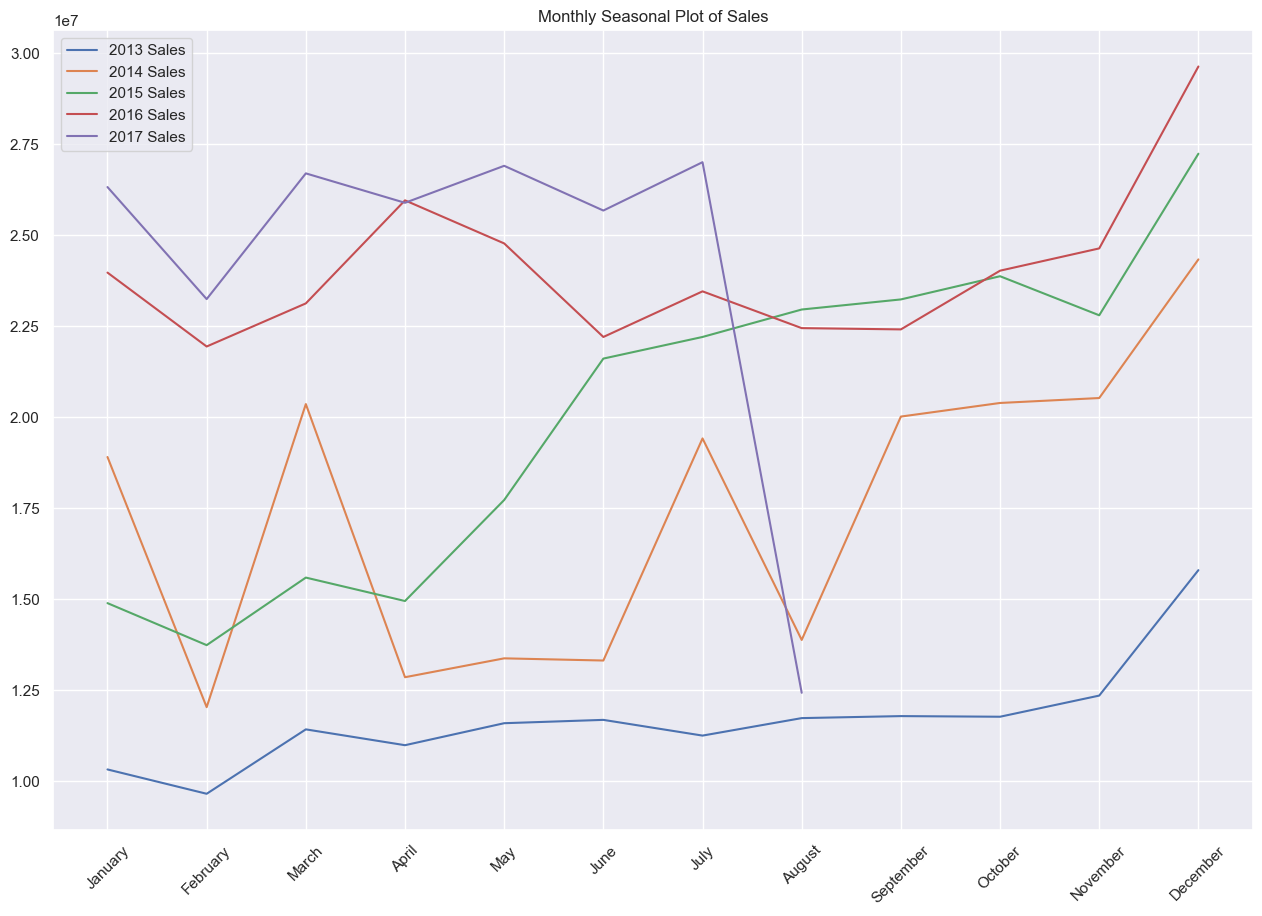

In [48]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(np.arange(1, 13, step=1),['January', 'February', 'March','April','May',
                                        'June','July','August','September','October','November',
                                        'December'],rotation = 45)

ax.plot(df_agg_month[0:12]['month'], df_agg_month[0:12]['sales'], label = '2013 Sales')
ax.plot(df_agg_month[12:24]['month'],df_agg_month[12:24]['sales'], label = '2014 Sales')
ax.plot(df_agg_month[24:36]['month'],df_agg_month[24:36]['sales'], label = '2015 Sales')
ax.plot(df_agg_month[36:48]['month'],df_agg_month[36:48]['sales'], label = '2016 Sales')
ax.plot(df_agg_month[48:60]['month'],df_agg_month[48:60]['sales'], label = '2017 Sales')


plt.title('Monthly Seasonal Plot of Sales')
plt.legend()
plt.show()

#### Trend and seasnality with boxplots

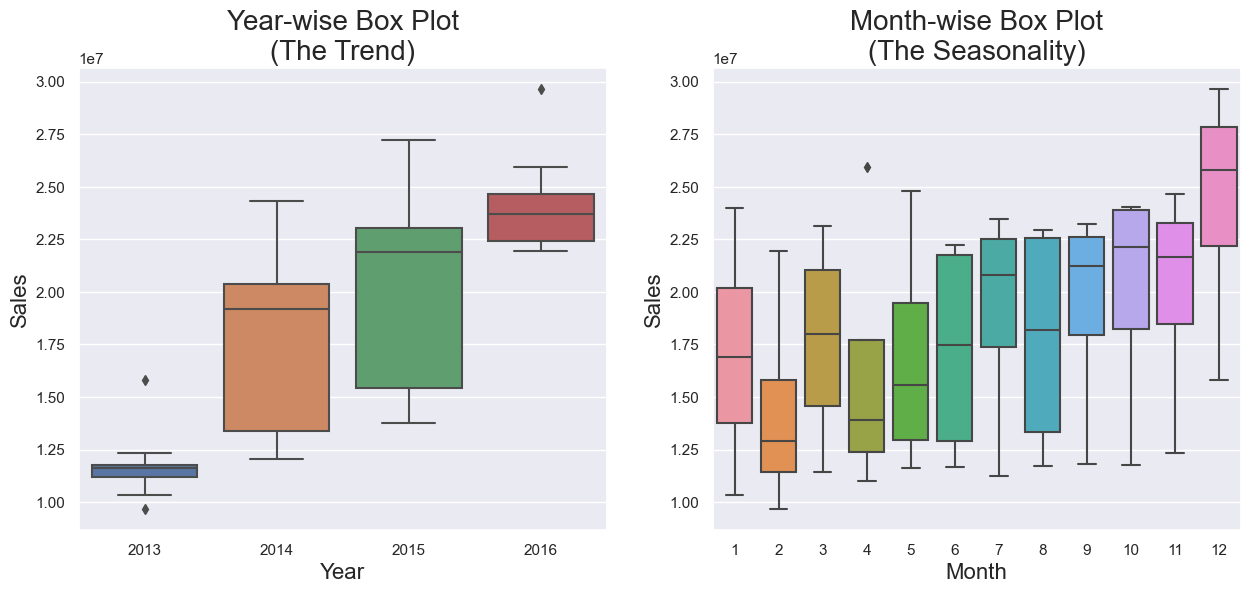

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(x = 'year', y = 'sales',data = df_agg_month[:'2016'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center')
ax[0].set_xlabel('Year', fontsize = 16)
ax[0].set_ylabel('Sales', fontsize = 16)

sns.boxplot(x = 'month', y = 'sales',data = df_agg_month[:'2016'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center')
ax[1].set_xlabel('Month', fontsize = 16)
ax[1].set_ylabel('Sales', fontsize = 16);

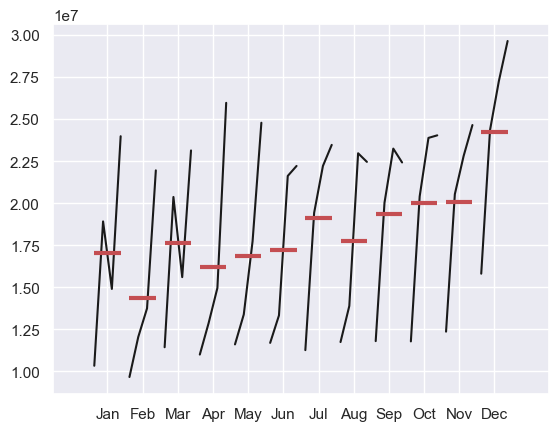

In [50]:
month_plot(df_agg_month[:'2016']['sales']);

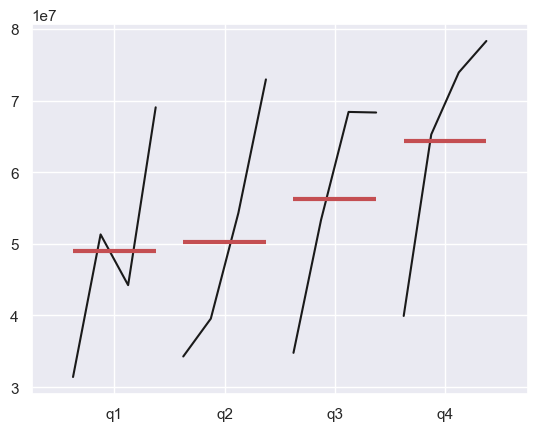

In [51]:
quarter_plot(df_agg_sales.resample('Q').sum(numeric_only=True)[:'2016']['sales']);

___

### Lag plots

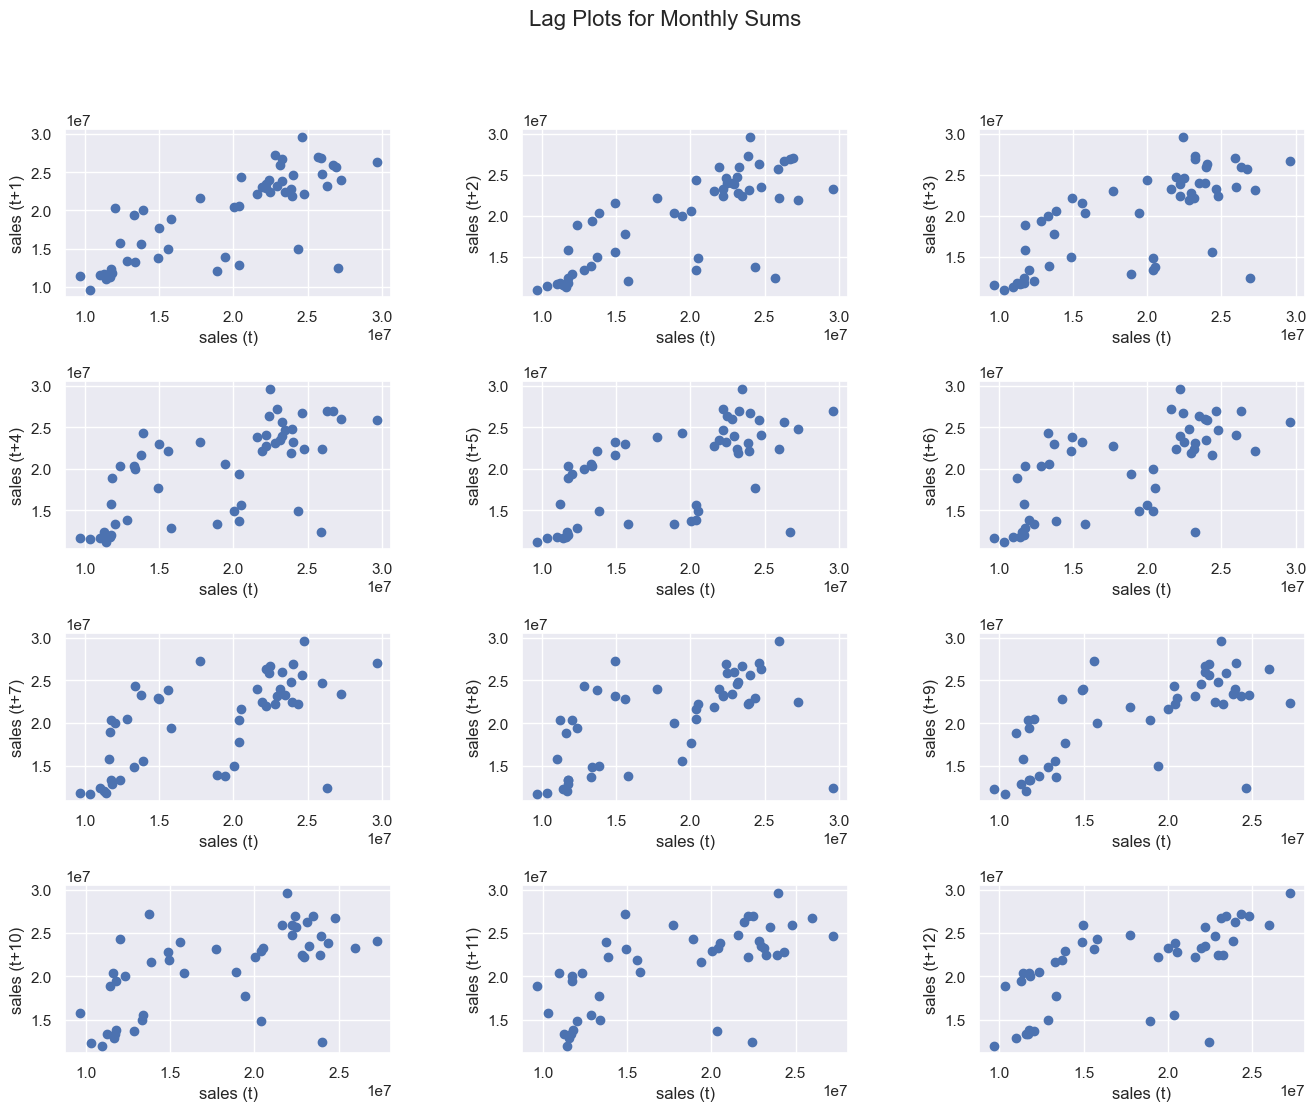

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize = (16,12))

axes[0,0].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+1))
axes[0,0].set_xlabel('sales (t)')
axes[0,0].set_ylabel('sales (t+1)')

axes[0,1].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+2))
axes[0,1].set_xlabel('sales (t)')
axes[0,1].set_ylabel('sales (t+2)')

axes[0,2].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+3))
axes[0,2].set_xlabel('sales (t)')
axes[0,2].set_ylabel('sales (t+3)')

axes[1,0].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+4))
axes[1,0].set_xlabel('sales (t)')
axes[1,0].set_ylabel('sales (t+4)')

axes[1,1].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+5))
axes[1,1].set_xlabel('sales (t)')
axes[1,1].set_ylabel('sales (t+5)')

axes[1,2].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+6))
axes[1,2].set_xlabel('sales (t)')
axes[1,2].set_ylabel('sales (t+6)')

axes[2,0].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+7))
axes[2,0].set_xlabel('sales (t)')
axes[2,0].set_ylabel('sales (t+7)')

axes[2,1].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+8))
axes[2,1].set_xlabel('sales (t)')
axes[2,1].set_ylabel('sales (t+8)')

axes[2,2].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+9))
axes[2,2].set_xlabel('sales (t)')
axes[2,2].set_ylabel('sales (t+9)')

axes[3,0].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+10))
axes[3,0].set_xlabel('sales (t)')
axes[3,0].set_ylabel('sales (t+10)')

axes[3,1].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+11))
axes[3,1].set_xlabel('sales (t)')
axes[3,1].set_ylabel('sales (t+11)')

axes[3,2].scatter(y = df_agg_month['sales'],x = df_agg_month['sales'].shift(+12))
axes[3,2].set_xlabel('sales (t)')
axes[3,2].set_ylabel('sales (t+12)')

fig.subplots_adjust(
    wspace=0.4,
    hspace=0.5)
fig.suptitle("Lag Plots for Monthly Sums",fontsize=16)
plt.show()

___

### Autocorrelation plot

In [53]:
acf(df_agg_month['sales'])

array([1.        , 0.75857189, 0.71370222, 0.63386279, 0.56617938,
       0.50270984, 0.51396164, 0.45961821, 0.40926373, 0.41264315,
       0.33703043, 0.31932616, 0.30792893, 0.24170495, 0.20186174,
       0.20278461, 0.14869527, 0.13687239])

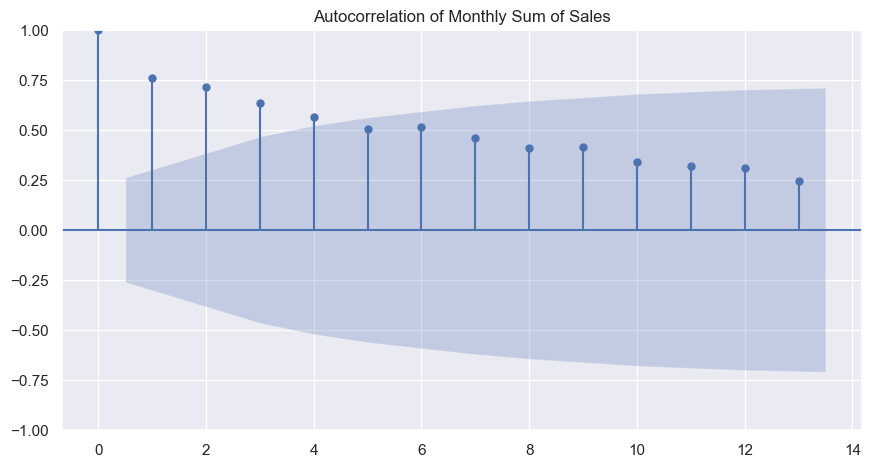

In [54]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
plot_acf(df_agg_month['sales'], lags = 13, title = 'Autocorrelation of Monthly Sum of Sales', ax=ax)
plt.show()

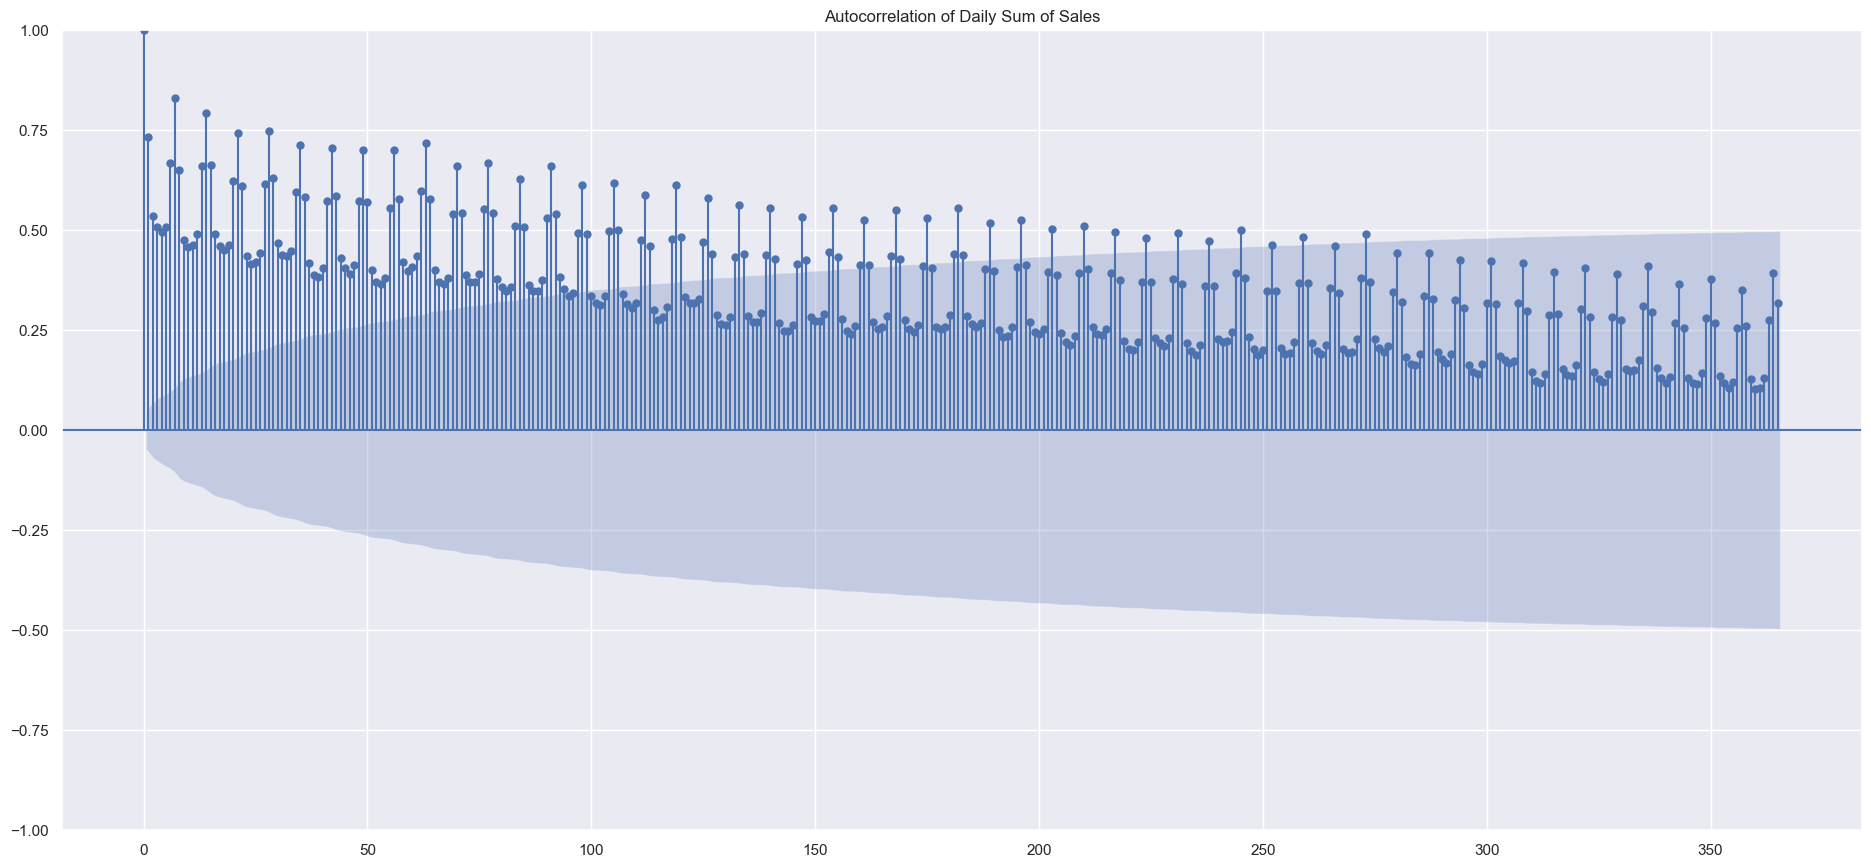

In [55]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_axes([0,0,1,1])
plot_acf(df_agg_sales['sales'], lags = 365, title = 'Autocorrelation of Daily Sum of Sales',ax = ax)
plt.show()

___

## Adjusting for inflation

Inflation data was downloaded from the World Bank's website.

In [56]:
df_ecuador = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/df_ecuador.csv',
                        index_col='year', parse_dates=True)

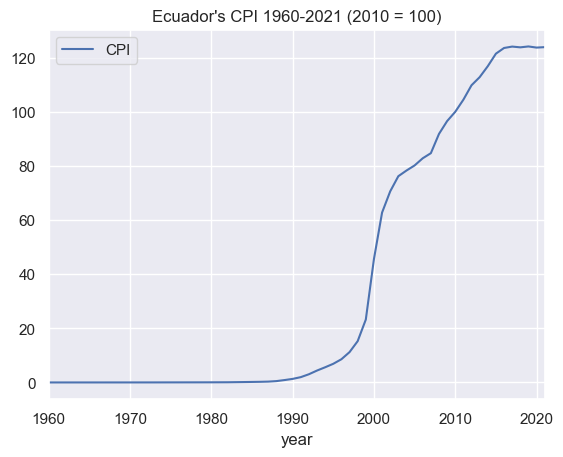

In [57]:
df_ecuador.plot( title = "Ecuador's CPI 1960-2021 (2010 = 100)");

In [58]:
df_ecuador[df_ecuador['CPI']==100]

,CPI
year,
2010-01-01,100.0


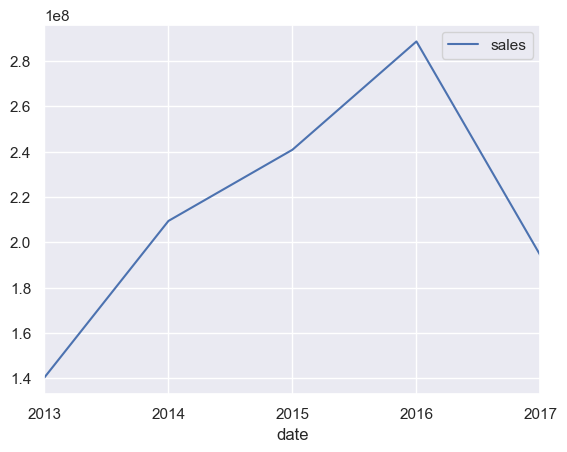

In [59]:
df_agg_annual = df_agg_sales.resample('Y').sum()
df_agg_annual.plot();

In [60]:
df_ecuador = df_ecuador.loc['2013':'2017'][['CPI']].set_index(df_agg_annual.index)

In [61]:
df_agg_annual['CPI'] = df_ecuador.loc['2013':'2017']['CPI']
df_agg_annual['adjusted sales - 2010 equivelent'] = (df_agg_annual['sales'] / df_agg_annual['CPI']) * 100

In [62]:
df_agg_annual

,sales,CPI,adjusted sales - 2010 equivelent
date,,,
2013-12-31,1.404190e+08,112.793166,1.244925e+08
2014-12-31,2.094742e+08,116.841561,1.792806e+08
2015-12-31,2.408801e+08,121.476252,1.982940e+08
2016-12-31,2.886545e+08,123.575683,2.335852e+08
2017-12-31,1.942171e+08,124.091409,1.565113e+08


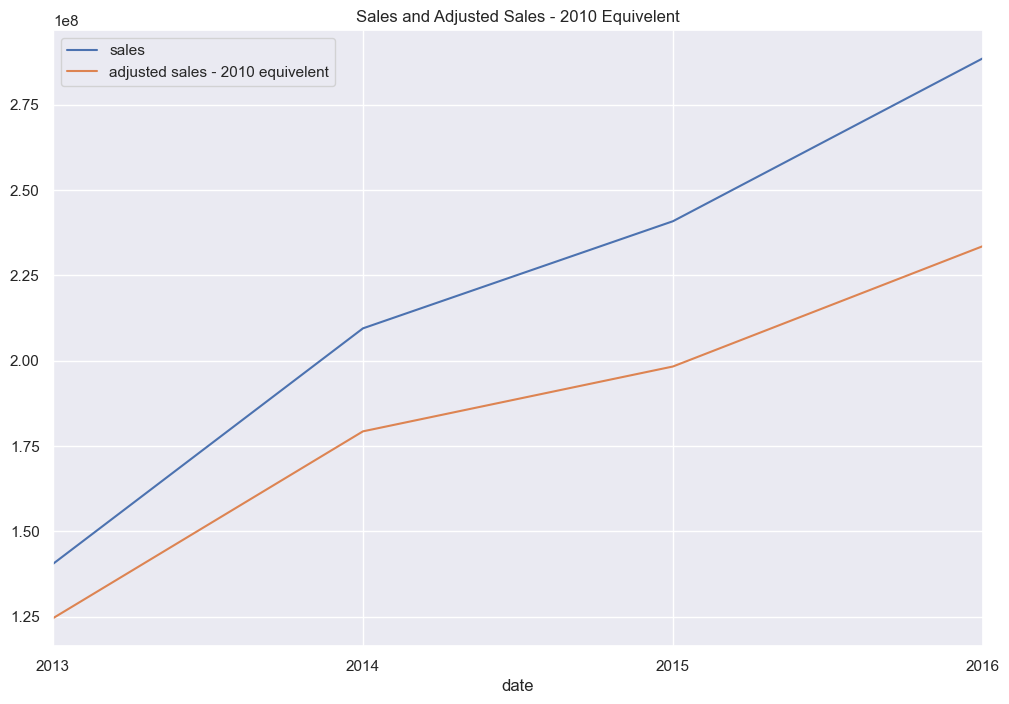

In [63]:
df_agg_annual[:'2016'][['sales','adjusted sales - 2010 equivelent']].plot(figsize = (12,8), title='Sales and Adjusted Sales - 2010 Equivelent');

___

## ETS Decomposition

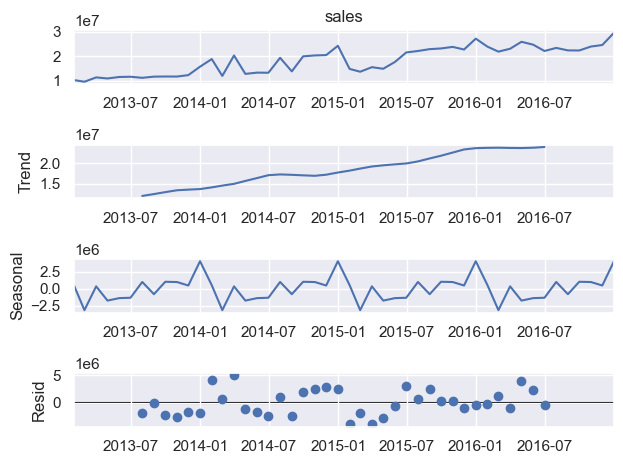

In [64]:
result = seasonal_decompose(df_agg_month['sales'].loc[:'2016'], model='additive')  
result.plot();

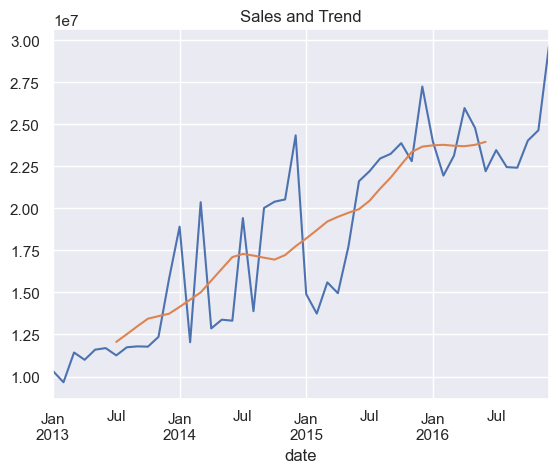

In [65]:
df_agg_month[:'2016']['sales'].plot(title = 'Sales and Trend')
result.trend.plot();

___

## Augmented Dickey Fuller test for stationarity

In [66]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [67]:
adf_test(df_agg_month[:'2016']['sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.178569
p-value                  0.682746
# lags used              1.000000
# observations          46.000000
critical value (1%)     -3.581258
critical value (5%)     -2.926785
critical value (10%)    -2.601541
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
